## TSLA Buy and Sell Strategy - Relative Strength Index (RSI)

In [2]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [10]:
df = yf.download('TSLA', start='2020-07-27', end='2025-07-26')
df

/tmp/ipykernel_8358/3046992886.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TSLA', start='2020-07-27', end='2025-07-26')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-07-27,102.639999,103.195999,94.199997,95.666664,240730500
2020-07-28,98.432671,104.313332,98.294670,100.266670,237130500
2020-07-29,99.940666,102.320663,99.133331,100.066666,141403500
2020-07-30,99.166000,100.882668,98.066666,99.199997,114315000
2020-07-31,95.384003,101.136665,94.732002,101.000000,183123000
...,...,...,...,...,...
2025-07-21,328.489990,338.000000,326.880005,334.399994,75768800
2025-07-22,332.109985,335.410004,321.549988,329.739990,77370400


In [11]:
df.columns = df.columns.droplevel(level=1)

In [12]:
df

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-07-27,102.639999,103.195999,94.199997,95.666664,240730500
2020-07-28,98.432671,104.313332,98.294670,100.266670,237130500
2020-07-29,99.940666,102.320663,99.133331,100.066666,141403500
2020-07-30,99.166000,100.882668,98.066666,99.199997,114315000
2020-07-31,95.384003,101.136665,94.732002,101.000000,183123000
...,...,...,...,...,...
2025-07-21,328.489990,338.000000,326.880005,334.399994,75768800
2025-07-22,332.109985,335.410004,321.549988,329.739990,77370400
2025-07-23,332.559998,336.200012,328.670013,330.899994,92553800


In [13]:
# Create a function to calculate Relative Strength Index (RSI)
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

In [22]:
# Create the RSI Strategy function
def rsi_strategy(data, rsi_col, low_thresh = 30, high_thresh = 70):
    buy_signal = [data.index[0]]
    sell_signal = []
    last_signal = "Buy"

    for i in range(1, len(data)):
        rsi_prev = data[rsi_col].iloc[i-1]
        rsi_curr = data[rsi_col].iloc[i]

        if pd.notna(rsi_prev) and pd.notna(rsi_curr):
            if last_signal == 'Buy' and rsi_curr <= high_thresh and rsi_prev > high_thresh:
                sell_signal.append(data.index[i])
                #buy_signal.append(None)
                last_signal = "Sell"

            elif last_signal == 'Sell' and rsi_curr >= low_thresh and rsi_prev < low_thresh:
                buy_signal.append(data.index[i])
                #sell_signal.append(None)
                last_signal = 'Buy'

    return buy_signal, sell_signal

In [23]:
# Apply the RSI Strategy
df["RSI"] = compute_rsi(df)
buy_dates, sell_dates = rsi_strategy(df, "RSI")

In [24]:
buy_dates

[Timestamp('2020-07-27 00:00:00'),
 Timestamp('2020-11-02 00:00:00'),
 Timestamp('2021-03-09 00:00:00'),
 Timestamp('2021-05-24 00:00:00'),
 Timestamp('2021-12-21 00:00:00'),
 Timestamp('2022-01-26 00:00:00'),
 Timestamp('2022-04-27 00:00:00'),
 Timestamp('2022-09-07 00:00:00'),
 Timestamp('2022-10-21 00:00:00'),
 Timestamp('2023-03-13 00:00:00'),
 Timestamp('2023-04-28 00:00:00'),
 Timestamp('2023-08-09 00:00:00'),
 Timestamp('2023-11-02 00:00:00'),
 Timestamp('2024-02-08 00:00:00'),
 Timestamp('2024-08-06 00:00:00'),
 Timestamp('2024-10-24 00:00:00'),
 Timestamp('2025-02-13 00:00:00'),
 Timestamp('2025-06-06 00:00:00')]

In [25]:
df

Price,Close,High,Low,Open,Volume,RSI
Date,,,,,,
2020-07-27,102.639999,103.195999,94.199997,95.666664,240730500,NaN
2020-07-28,98.432671,104.313332,98.294670,100.266670,237130500,NaN
2020-07-29,99.940666,102.320663,99.133331,100.066666,141403500,NaN
2020-07-30,99.166000,100.882668,98.066666,99.199997,114315000,NaN
2020-07-31,95.384003,101.136665,94.732002,101.000000,183123000,NaN
...,...,...,...,...,...,...
2025-07-21,328.489990,338.000000,326.880005,334.399994,75768800,54.874420
2025-07-22,332.109985,335.410004,321.549988,329.739990,77370400,66.059738
2025-07-23,332.559998,336.200012,328.670013,330.899994,92553800,60.153720


In [26]:
df.loc[buy_dates]

Price,Close,High,Low,Open,Volume,RSI
Date,,,,,,
2020-07-27,102.639999,103.195999,94.199997,95.666664,240730500,NaN
2020-11-02,133.503326,135.660004,130.766663,131.333328,87063300,31.762822
2021-03-09,224.526672,226.029999,198.403336,202.726669,202569900,37.974711
2021-05-24,202.146667,204.826660,191.216660,193.866669,103674300,34.788911
2021-12-21,312.843323,313.166656,295.373322,305.623322,71517900,31.646601
2022-01-26,312.470001,329.230011,302.000000,317.476654,104867400,30.406402
2022-04-27,293.836670,306.000000,292.453339,299.526672,76956300,31.325469
2022-09-07,283.700012,283.839996,272.269989,273.100006,50028900,34.325314
2022-10-21,214.440002,214.660004,203.800003,206.419998,75713800,36.144701


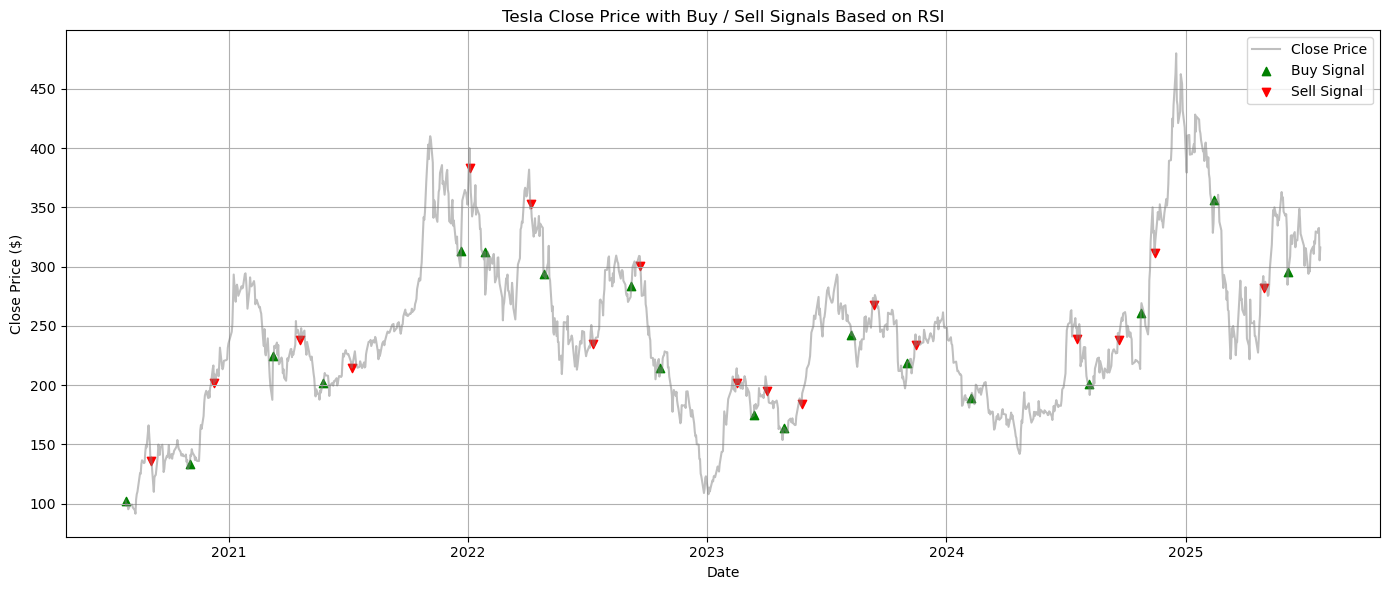

In [27]:
# Plot Tesla's Close Price with Buy / Sell Markers
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5, color='gray')
plt.scatter(buy_dates, df.loc[buy_dates, "Close"], marker="^", color="green", label="Buy Signal")
plt.scatter(sell_dates, df.loc[sell_dates, "Close"], marker="v", color="red", label="Sell Signal")
plt.title("Tesla Close Price with Buy / Sell Signals Based on RSI")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()

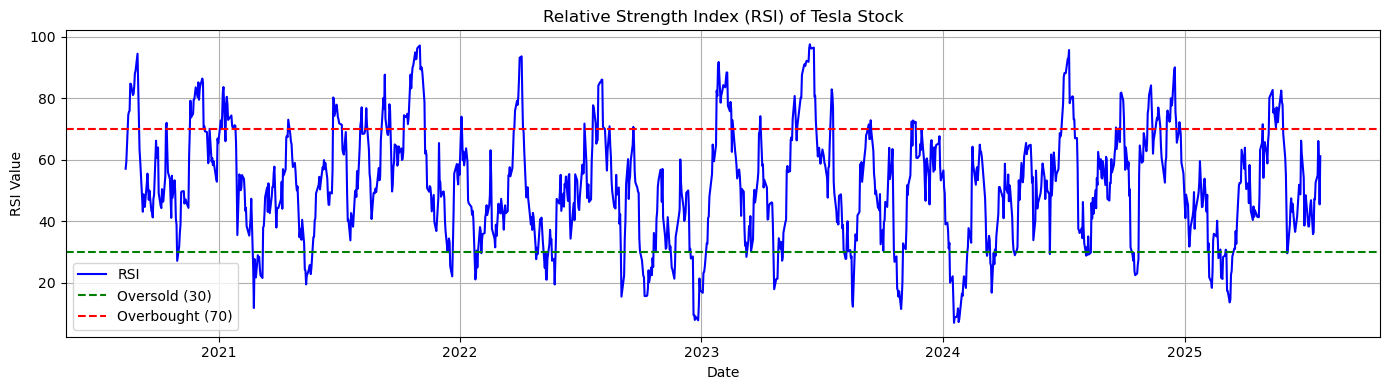

In [28]:
# Plot the RSI values with the threshold lines
plt.figure(figsize=(14, 4))
plt.plot(df['RSI'], label='RSI', color='blue')
plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
plt.title("Relative Strength Index (RSI) of Tesla Stock")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()